In [2]:
using SparseArrays, Plots, LinearAlgebra, DifferentialEquations, Arpack

In [3]:
using LaTeXStrings

## Ecuación de una circunferencia

Por un lado las coordenadas deben satisfacer la ecuación:
$x^2 + y^2 = r^2 \rightarrow y = \pm\sqrt{r^2-x^2}$

Y por otro lado la distancia entre puntos sucesivos 

In [4]:
radio = 1; N = 100; theta = 0:2*pi/(N):2*pi-2*pi/N;

In [5]:
x = radio*cos.(theta); y = radio*sin.(theta);

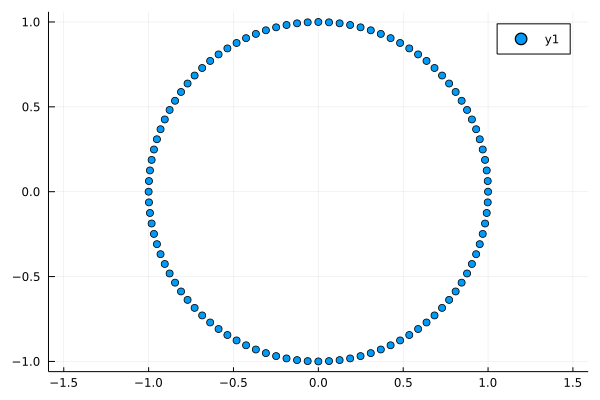

In [6]:
scatter(x, y, ratio = 1)

In [7]:
R = [x y]

100×2 Matrix{Float64}:
 1.0        0.0
 0.998027   0.0627905
 0.992115   0.125333
 0.982287   0.187381
 0.968583   0.24869
 0.951057   0.309017
 0.929776   0.368125
 0.904827   0.425779
 0.876307   0.481754
 0.844328   0.535827
 0.809017   0.587785
 0.770513   0.637424
 0.728969   0.684547
 ⋮         
 0.728969  -0.684547
 0.770513  -0.637424
 0.809017  -0.587785
 0.844328  -0.535827
 0.876307  -0.481754
 0.904827  -0.425779
 0.929776  -0.368125
 0.951057  -0.309017
 0.968583  -0.24869
 0.982287  -0.187381
 0.992115  -0.125333
 0.998027  -0.0627905

In [8]:
dr = norm(R[1, :]-R[2, :]);

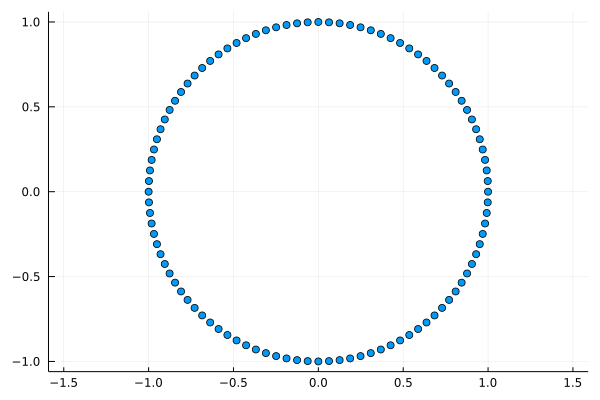

In [9]:
scatter(R[:, 1], R[:, 2], label="", ratio = 1)

In [10]:
#matriz de acoplamiento

V = zeros(ComplexF64, N,N)
for i = 1:N
    for j = 1:N
        if abs(norm(R[i, :] - R[j, :]) - dr) < 1e-5
            V[i, j] = 1
        else
            V[i, j] = 0
        end
    end
end

V[1, end] = 1; V[end, 1] = 1;

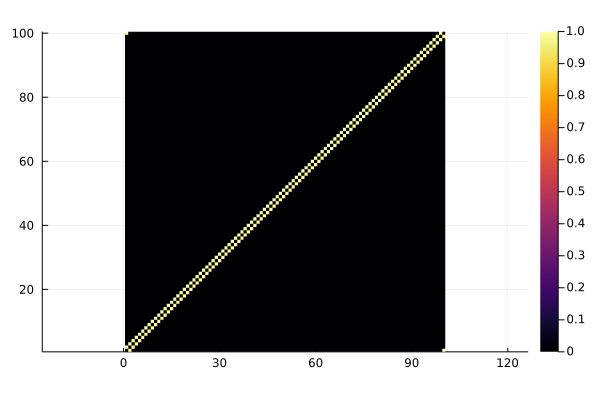

In [11]:
heatmap(real(V), ratio = 1)

In [12]:
function dnls_derivs(du, u, p, t) # agregar parámetros
    H = p; du[:] = H*u
end;

In [13]:
function evolution(H, ci, zmax, h, at, u0)     # eps -> Disorder width
    zspan = (0.0, zmax); p = H; prob = ODEProblem(dnls_derivs, u0, zspan, p);
    sol = solve(prob, RK4(), adaptive = false, dt = h, saveat = at);
    return sol
end;

In [14]:
γ = 0.0; # Parámetro no lineal
ci = 1.0; # Amplitud condición inicial 
tmax = 20; # Tiempo máximo
h = 0.01; # Paso de integración
at = h; # Paso para guardar la solución
Vcoup = im*V;
u0 = zeros(ComplexF64, N);  u0[1] = ci; #u0[8]=2*ci;
Nvec = 1:N
#u0 = complex(exp.(-1e10*(Nvec .- 51.0).^2))
H = Vcoup;
sol = evolution(H, ci, tmax, h, at, u0);

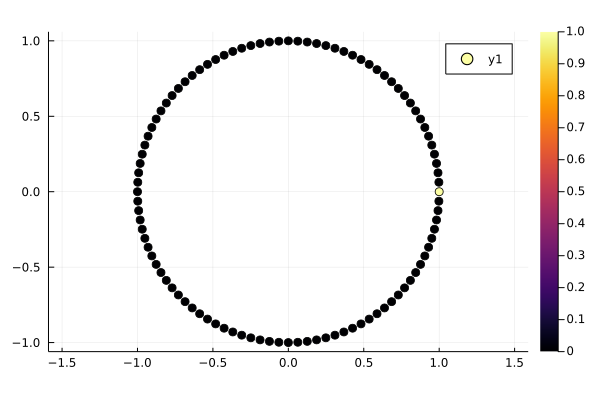

In [15]:
plot(x, y, marker_z = abs.(u0), seriestype = :scatter, markersize = 4.65,  ratio = 1)

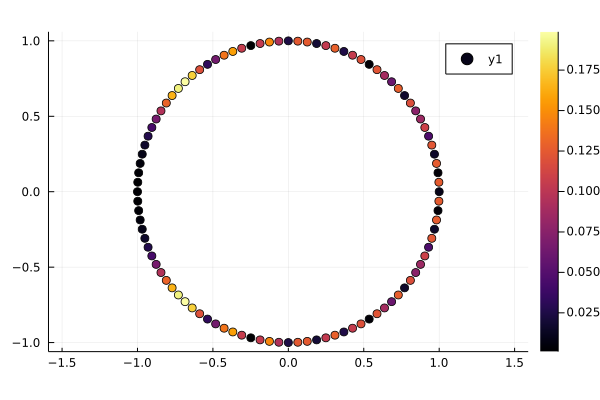

In [20]:
plot(x, y, marker_z = E[:, 2000], seriestype = :scatter, markersize = 4.65,  ratio = 1)

In [17]:
E = zeros(N, length(sol.t))
for i = 1:length(sol.t)
    E[:, i] = abs.(sol.u[i])
end
#heatmap(sol.t, 1:101, E, xlabel = L"z", ylabel = L"n")

In [23]:
angleE = zeros(N, length(sol.t))
for i = 1:length(sol.t)
    angleE[:, i] = angle.(sol.u[i])
end
#heatmap(sol.t, 1:101, E, xlabel = L"z", ylabel = L"n")

In [179]:
E

100×101 Matrix{Float64}:
 1.0  0.9999       0.9996       0.9991       …  0.235438     0.223891
 0.0  0.0099995    0.019996     0.0299865       0.577934     0.576725
 0.0  4.99983e-5   0.000199973  0.000449865     0.348334     0.352834
 0.0  1.66667e-7   1.33321e-6   4.499e-6        0.125771     0.128943
 0.0  4.16667e-10  6.66625e-9   3.37443e-8      0.032791     0.0339957
 0.0  0.0          2.4999e-11   1.99974e-10  …  0.00671741   0.00703963
 0.0  0.0          6.94431e-14  9.58238e-13     0.00113534   0.00120243
 0.0  0.0          1.38889e-16  3.74972e-15     0.000163471  0.000174944
 0.0  0.0          1.73611e-19  1.19786e-17     2.05119e-5   2.21795e-5
 0.0  0.0          0.0          3.06703e-20     2.28137e-6   2.49234e-6
 0.0  0.0          0.0          6.0763e-23   …  2.27902e-7   2.51538e-7
 0.0  0.0          0.0          8.68056e-26     2.06655e-8   2.30428e-8
 0.0  0.0          0.0          7.2338e-29      1.71574e-9   1.93268e-9
 ⋮                                           ⋱ 

In [88]:
u0 = complex(exp.(-0.5*(Nvec .- 51.0).^2))
h = 0.01; 
sol = evolution(H, ci, tmax, h, at, u0);

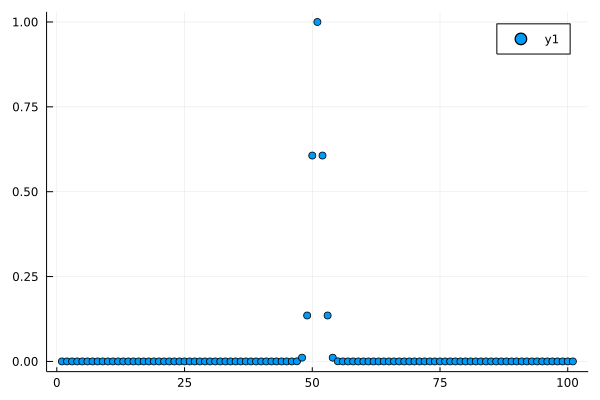

In [89]:
scatter(abs.(u0))

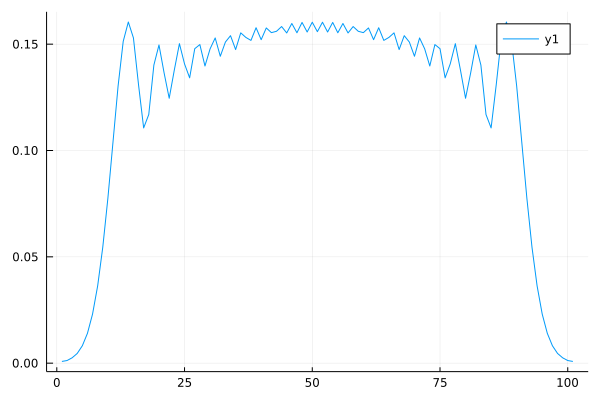

In [93]:
plot(E[:, end])

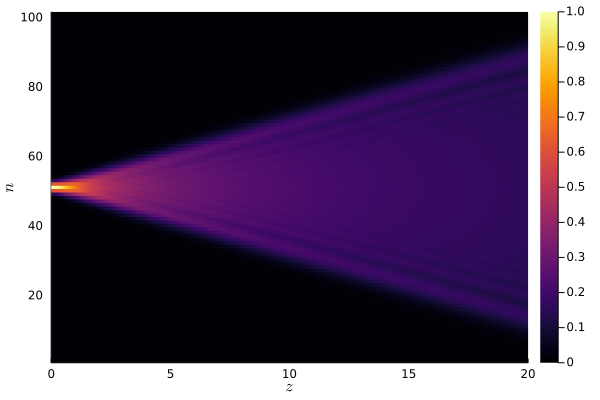

In [90]:
E = zeros(N, length(sol.t))
for i = 1:length(sol.t)
    E[:, i] = abs.(sol.u[i])
end
heatmap(sol.t, 1:101, E, xlabel = L"z", ylabel = L"n")

## Propagación no lineal (DNLSE)

\begin{equation}
i\frac{d\phi_n}{dz} + V\left( \phi_{n+1} + \phi_{n-1} \right ) + \gamma |\phi_n|^2 \phi_n = 0
\end{equation}

Consideremos ahora el caso de tres guías de onda (trímero):

\begin{equation}
i\frac{d}{dz}\begin{bmatrix} \phi_1 \\ \phi_2 \\ \phi_3 \end{bmatrix} + \begin{bmatrix} 0 & V & 0\\ V & 0 & V \\ 0 & V & 0 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \\ \phi_3 \end{bmatrix} +\gamma \begin{bmatrix} |\phi_1|^2 & 0 & 0\\ 0 & |\phi_2|^2 & 0 \\ 0 & 0 & |\phi_3|^2 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \\ \phi_3 \end{bmatrix}  = 0,
\end{equation}

In [112]:
function dnls_derivs(du, u, p, t) # agregar parámetros
    V = p; N = γ*im*diagm(abs.(u).^2) ; du[:] = (V + N)*u
end;

In [109]:
function evolution(V, ci, zmax, h, at, u0)     # eps -> Disorder width
    zspan = (0.0, zmax); p = V; prob = ODEProblem(dnls_derivs, u0, zspan, p);
    sol = solve(prob, RK4(), adaptive = false, dt = h, saveat = at);
    return sol
end;

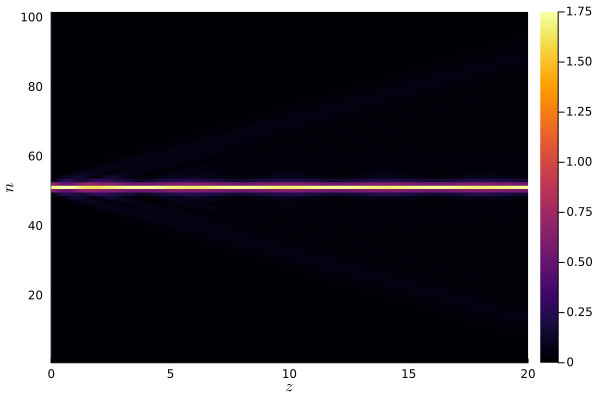

In [129]:
γ = 1.0; # Parámetro no lineal
ci = 1.0; # Amplitud condición inicial 
tmax = 20; # Tiempo máximo
h = 0.01; # Paso de integración
at = h; # Paso para guardar la solución
Vcoup = im*V;
#u0 = zeros(ComplexF64, N);  u0[51] = ci; #u0[8]=2*ci;
Nvec = 1:N
u0 = 1.7*complex(exp.(-(Nvec .- 51.0).^2))
H = Vcoup;
sol = evolution(H, ci, tmax, h, at, u0);
E = zeros(N, length(sol.t))
for i = 1:length(sol.t)
    E[:, i] = abs.(sol.u[i])
end
heatmap(sol.t, 1:101, E, xlabel = L"z", ylabel = L"n")

In [3]:
nmax = 5000; A = diagm(rand(nmax));

In [5]:
evals = @time eigvals(A);

  7.105750 seconds (14 allocations: 192.376 MiB, 1.62% gc time)


In [6]:
B = sparse(A);

In [7]:
B

5000×5000 SparseMatrixCSC{Float64,Int64} with 5000 stored entries:
  [1   ,    1]  =  0.324677
  [2   ,    2]  =  0.591238
  [3   ,    3]  =  0.259572
  [4   ,    4]  =  0.505733
  [5   ,    5]  =  0.61079
  [6   ,    6]  =  0.313824
  [7   ,    7]  =  0.163566
  [8   ,    8]  =  0.12139
  [9   ,    9]  =  0.905144
  [10  ,   10]  =  0.185288
  [11  ,   11]  =  0.457859
  [12  ,   12]  =  0.944936
  ⋮
  [4988, 4988]  =  0.362351
  [4989, 4989]  =  0.124394
  [4990, 4990]  =  0.326561
  [4991, 4991]  =  0.415219
  [4992, 4992]  =  0.215206
  [4993, 4993]  =  0.280715
  [4994, 4994]  =  0.958526
  [4995, 4995]  =  0.754781
  [4996, 4996]  =  0.713392
  [4997, 4997]  =  0.000265713
  [4998, 4998]  =  0.874952
  [4999, 4999]  =  0.0352334
  [5000, 5000]  =  0.859612

In [ ]:
evals = @time eigs(B);

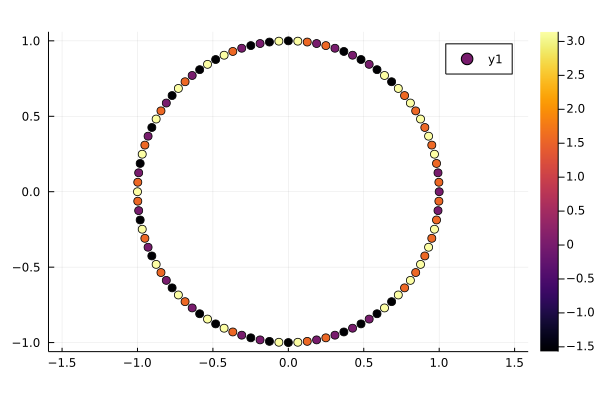

In [24]:
plot(x, y, marker_z = angleE[:, 2000], seriestype = :scatter, markersize = 4.65,  ratio = 1)

In [ ]:
c = a + ib; c = r e^(i*teta)

In [25]:
Float64(1.0)

1.0

In [35]:
f(x) = cos(x)

f (generic function with 1 method)

In [36]:
g(y) = sin(y)^2

g (generic function with 1 method)

In [29]:
function test(f, a)
    println(2*f(a))
end

test (generic function with 2 methods)

In [38]:
test(g, 1.65)

1.987479769908865
